<div style="text-align: right;">
<h4> <b>Author:</b> <a style="color:blue;">Sujith Kumar</a> </h4>
<h4> <b>Subject:</b> <a style="color:blue;">Linear Regression Case Study</a> </h4>
<h4> <b>Batch:</b> <a style="color:blue;">April 2022</a> </h4>
</div>   

In [31]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Import Libraries
import numpy as np
import pandas as pd

In [33]:
# load the data set
bike_df = pd.read_csv("day.csv")

# Understanding the data

In [34]:
#Get the shape of the dataset
bike_df.shape

(730, 16)

In [35]:
#print head and tail rows to look at the data
bike_df.head().append(bike_df.tail())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [36]:
#Check counts per year to understand data set
bike_df['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [37]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [38]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [39]:
# Get the null counts
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Step 2: Cleaning / Preparing the data

In [40]:
#Converting dteday to datetime
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'],dayfirst=True)

In [41]:
# There are no null columns in the dataset
# drop instant column as it is just the index
bike_df.drop('instant',axis=1,inplace=True)

In [42]:
# Define map function to put categorical values on season so that it is considered accordingly in model
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [43]:
#Define map for weather
def weather_map(x):
    return x.map({1:'clear', 2:'misty', 3:'rainy', 4:'bad'})

In [44]:
#Convert values for season and weathersit
bike_df[['season']]=bike_df[['season']].apply(season_map)

In [45]:
bike_df[['weathersit']]=bike_df[['weathersit']].apply(weather_map)

In [50]:
# It is observed that weekday values are starting from 0 as Tuesday
# Change weekday from numeric to Categorical
bike_df['weekday'] =bike_df['dteday'].dt.strftime('%a')

In [59]:
# Change the Month into categorical variable 
bike_df['mnth'] =bike_df['dteday'].dt.strftime('%b')


In [60]:
bike_df.head(10).append(bike_df.tail(10))

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,Mon,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,0,Jan,0,Tue,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-01-06,spring,0,Jan,0,Sat,1,clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-01-07,spring,0,Jan,0,Sun,1,misty,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2018-01-08,spring,0,Jan,0,Mon,0,misty,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2018-01-09,spring,0,Jan,0,Tue,0,clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2018-01-10,spring,0,Jan,0,Wed,1,clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# Visualizing the data

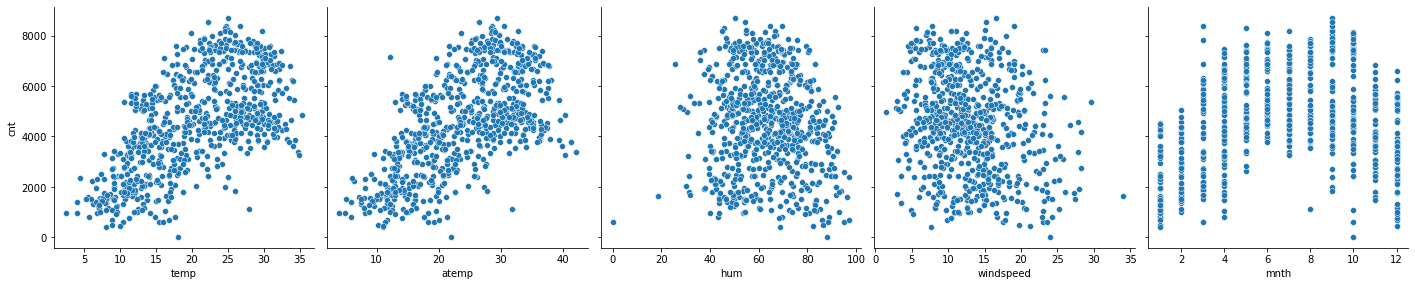

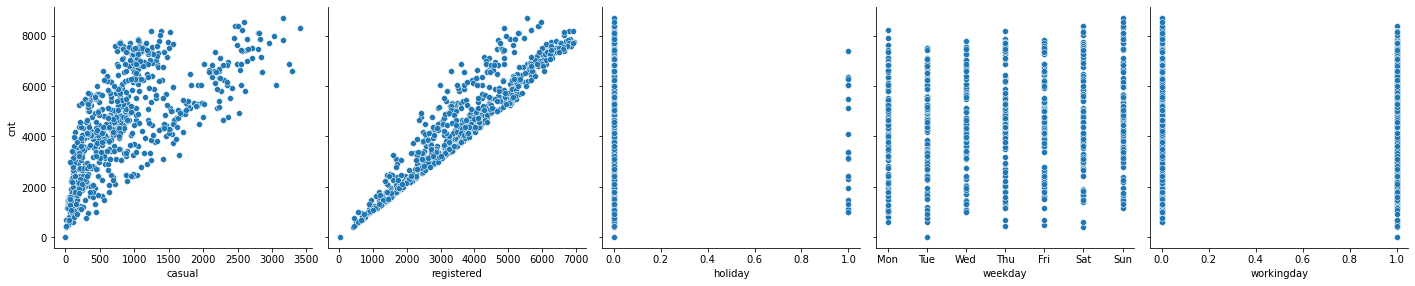

In [52]:
# Scatterplot against multiple features to check if linear regression model can be applied
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(bike_df, x_vars=['temp', 'atemp', 'hum','windspeed','mnth'], y_vars='cnt',size=4, aspect=1, kind='scatter')
sns.pairplot(bike_df, x_vars=['casual', 'registered', 'holiday','weekday','workingday'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

#### A linear pattern is observed on multiple features - cnt vs registered, cnt vs casual, cnt vs atemp etc. Linear model can be applied

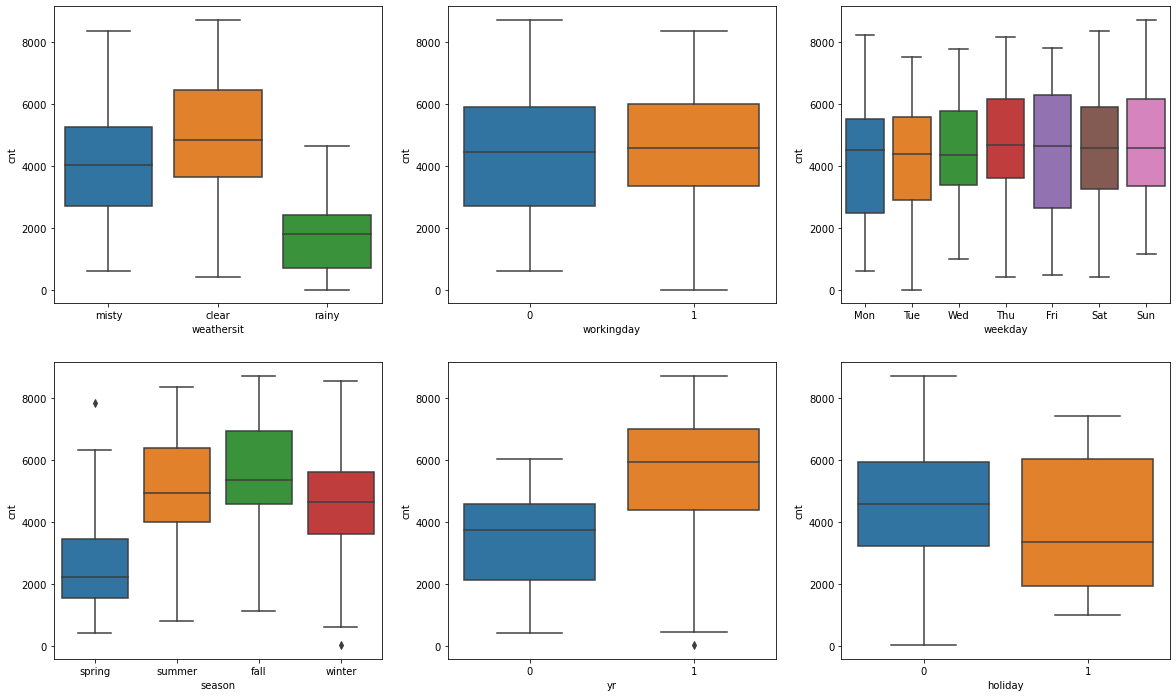

In [53]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.show()

<h2 style="color:green"><a style="background-color:yellow;">Observation</a>: </h2>
<li>More users during Clear weather </li>
<li>More users during Summer and fall </li>
<li>Users have increased in 2019 from 2018 </li>

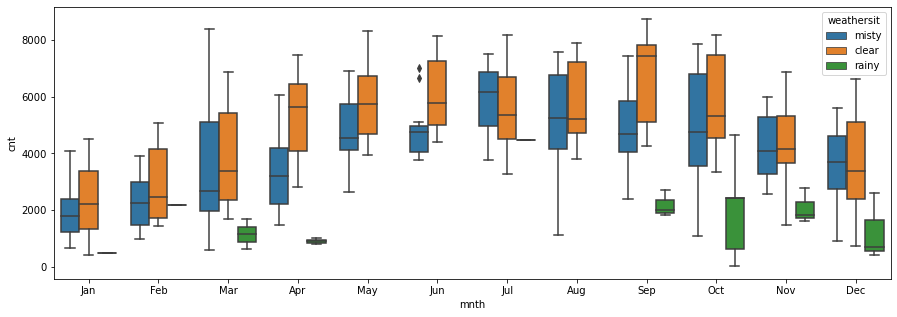

In [62]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'weathersit', data = bike_df)
plt.show()

<h2 style="color:green"><a style="background-color:yellow;">Observation</a>: </h2>
<li>Usage has increased from Jan to Sep and then a drop is observed </li>
<li>Usage is maximum during September</li>
<li>Clear weather is preferred during all months</li>

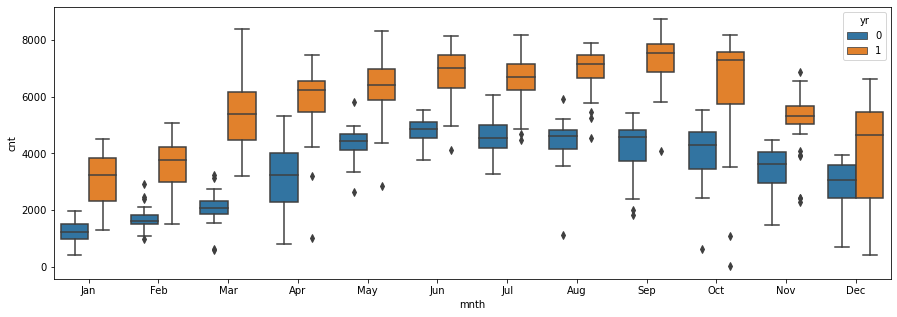

In [64]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bike_df)
plt.show()

<h2 style="color:green"><a style="background-color:yellow;">Observation</a>: </h2>
<li>Usage has increased in 2019 when compared with 2018 </li>
<li>During both years Sep had the maximum usage</li>
<li>Jan and Feb are seeing low usage probably due to cold weather</li>

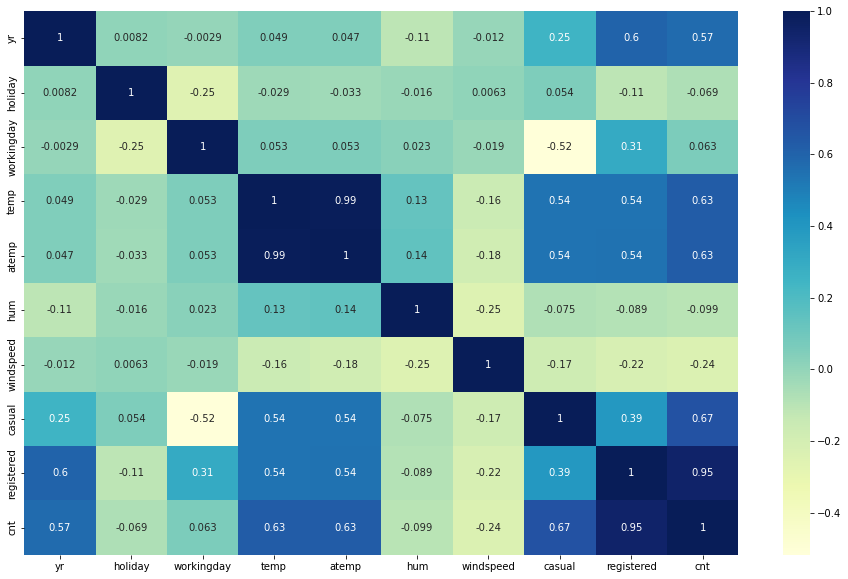

In [65]:
# Observe correlation between features
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

<h2 style="color:green"><a style="background-color:yellow;">Observation</a>: </h2>
<li>Registered user is showing very high correlation with cnt</li>
<li>Casual is also showing high correlation with cnt </li>
<li>From data dictionary it is mentioned that cnt = registered+casual</li>

In [66]:
# Check if there is any discrepancy in cnt calculation
eval_cnt = bike_df.cnt-bike_df.registered-bike_df.casual
eval_cnt.value_counts()

<h2 style="color:green"><a style="background-color:yellow;">Observation</a>: </h2>
<li>No discrepancies in cnt calculation</li>
<li>Since the target variable 'cnt' already includes 'casual' and 'registered' both the features can be dropped</li>

In [70]:
# Drop casual and registered on the basis of above analysis
bike_df.drop(['casual','registered'],axis=1,inplace=True)

In [75]:
#Drop dteday as other required attributes Year, Month are present
#Drop temp as temp and atemp are highly correlated
bike_df.drop(['dteday','temp'],axis=1,inplace=True)

In [78]:
# Generate dummy variables for the feature 'mnth','season' ,'weathersit','weekday'
# Drop one level as model can be explained by n-1
bike_df = pd.get_dummies(data=bike_df, columns=['mnth','season' ,'weathersit','weekday'],drop_first=True)

In [79]:
bike_df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weathersit_misty,weathersit_rainy,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split data into training and test sets

In [69]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

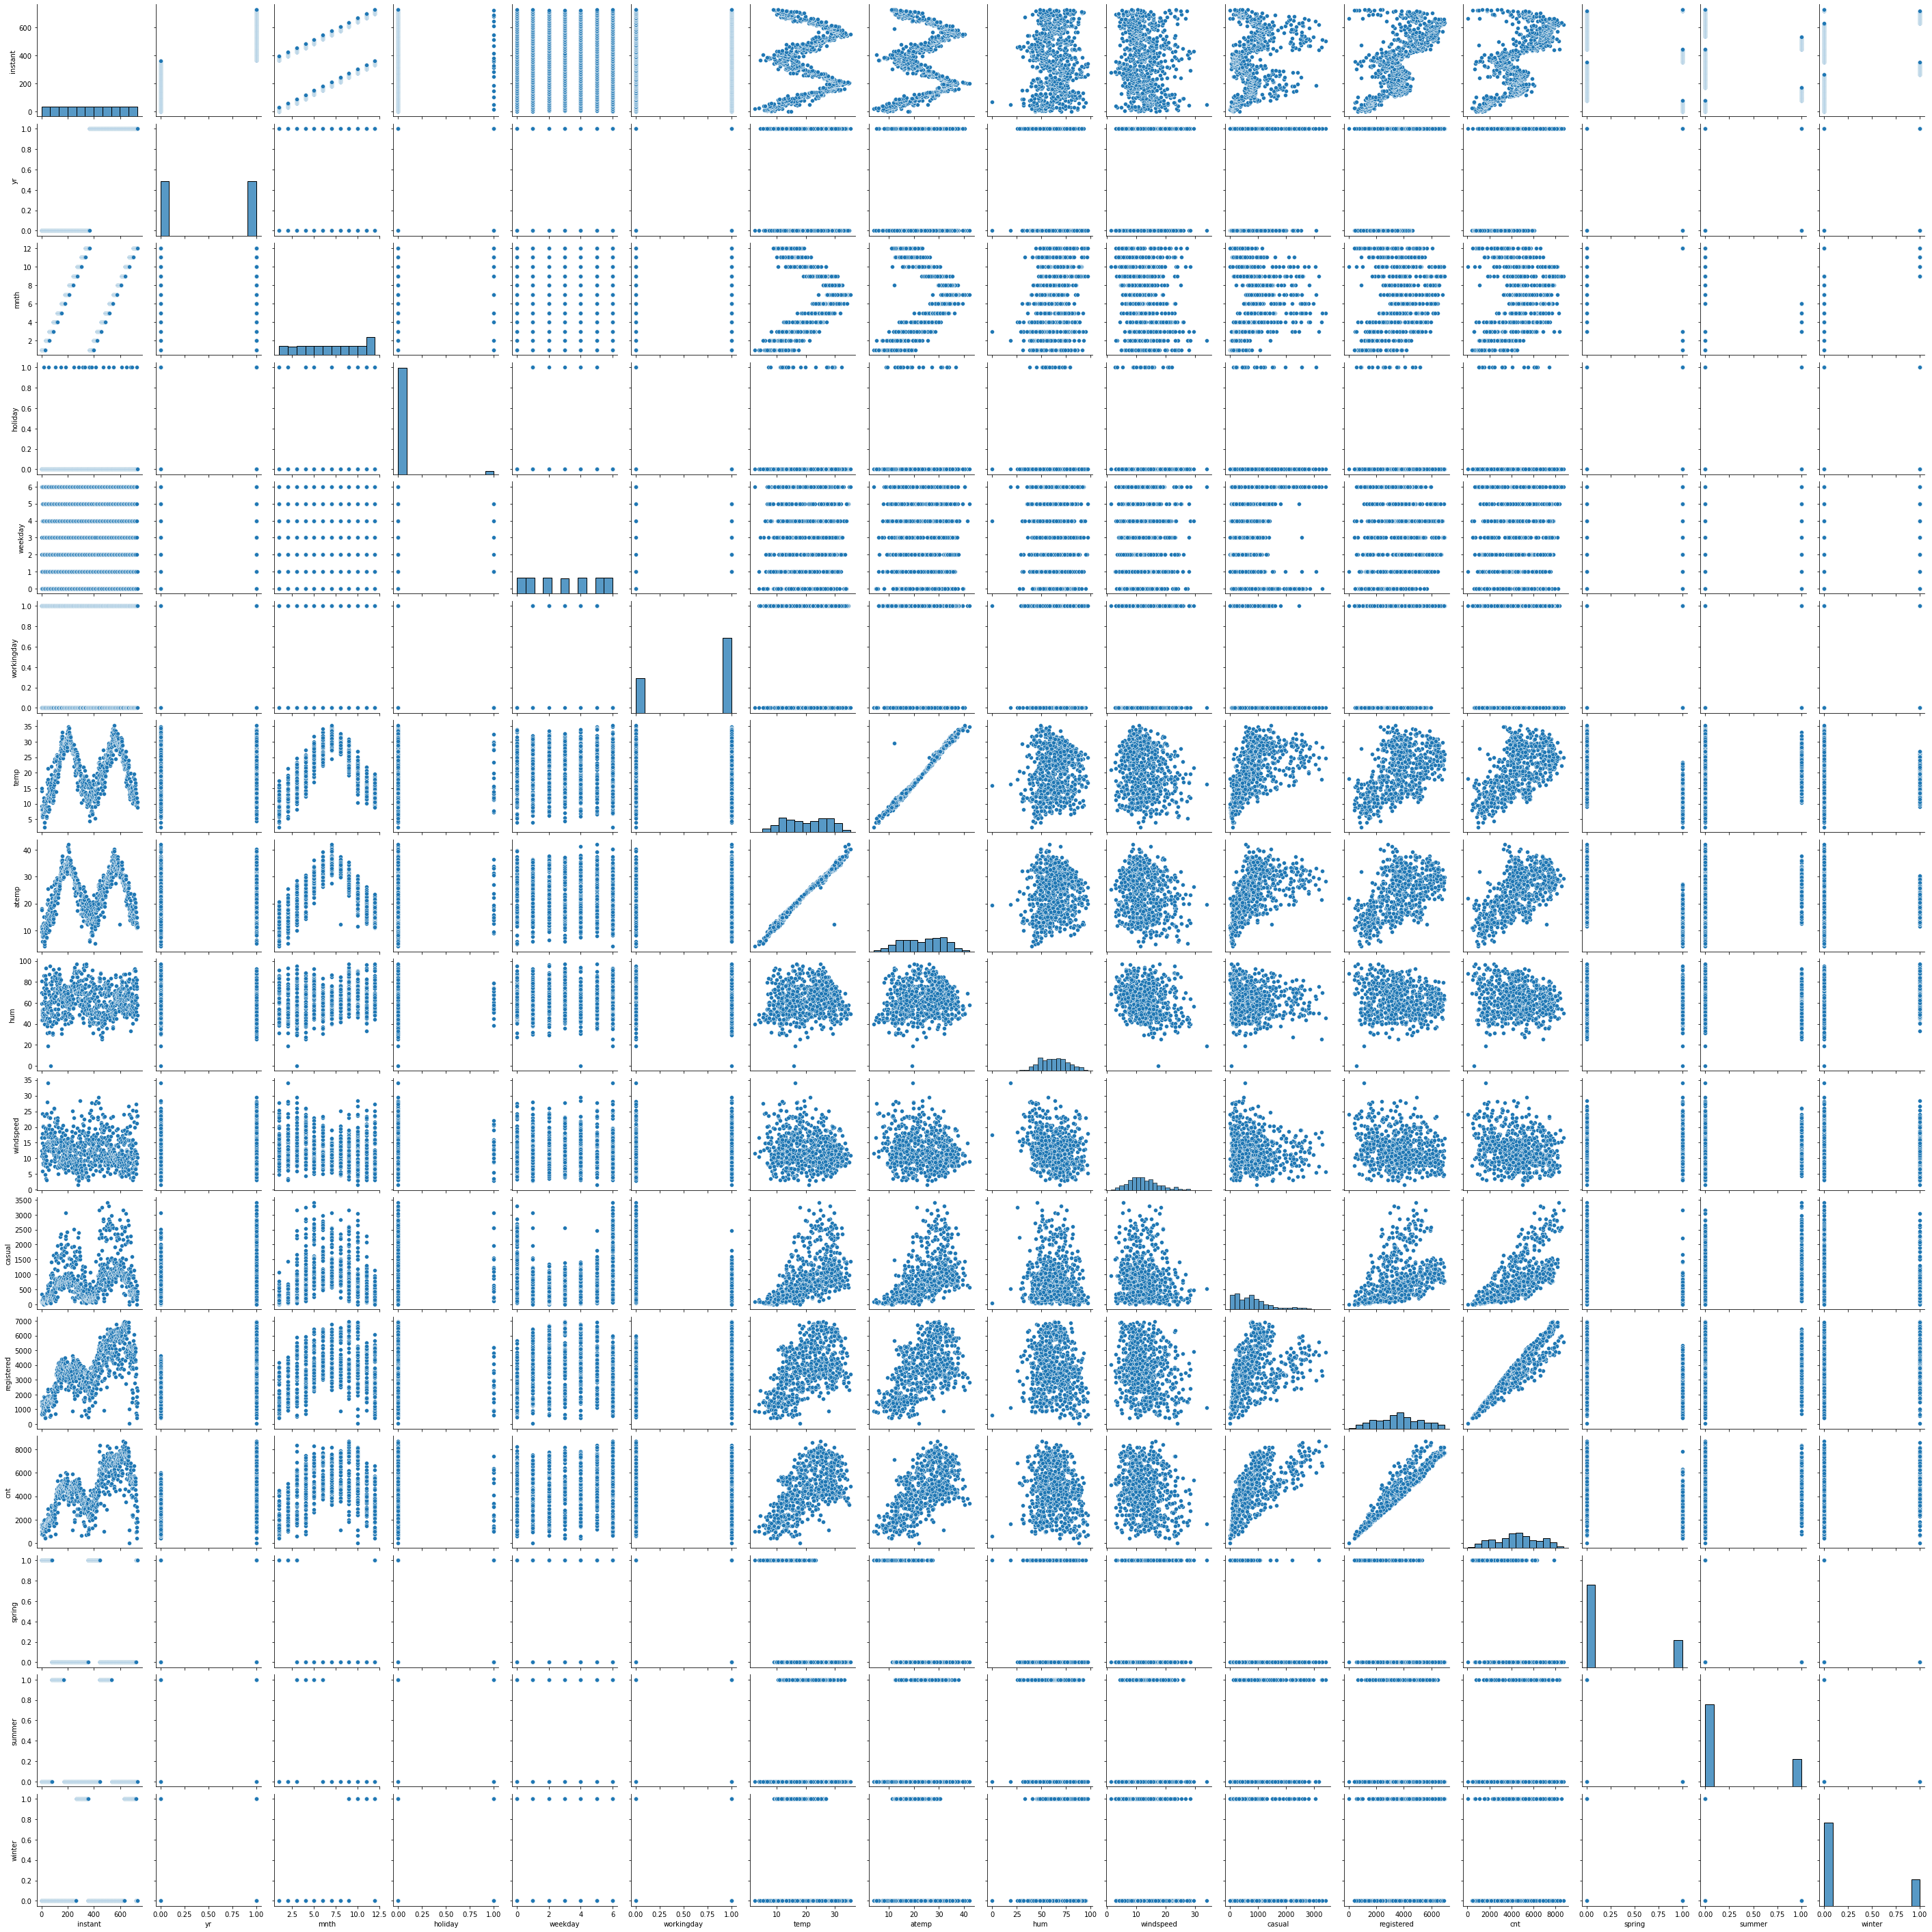

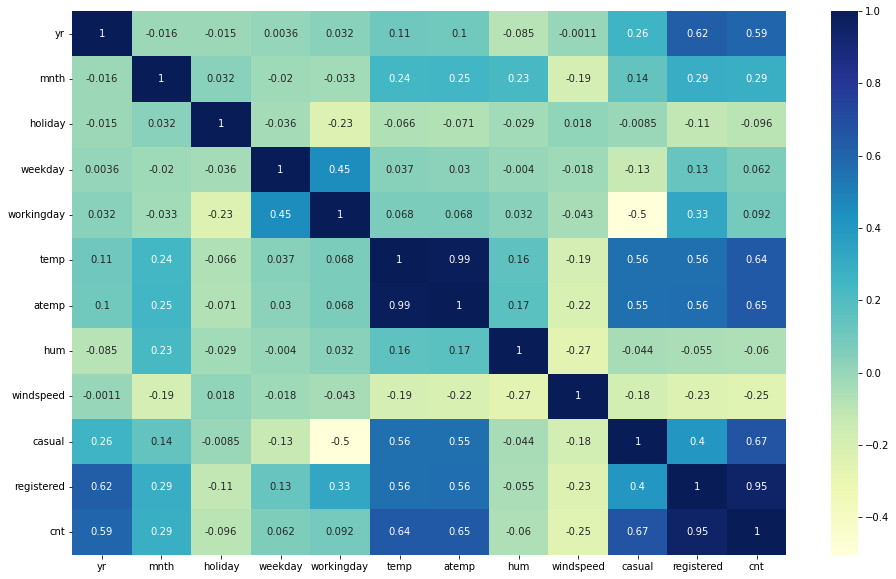

In [70]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()